In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf

In [ ]:
https://www.coursera.org/account/accomplishments/verify/GFWBJCDHKN7Zhttps://www.coursera.org/account/accomplishments/verify/GFWBJCDHKN7Z

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True
...,...,...,...,...,...,...
2137,2137,delta air lines inc com,delta air lines inc dela new,DAL,DAL,True
2138,2138,cognizant tech solutns a,cognizant tech solutions corp,CTSH,CTSH,True
2139,2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,PBDAX,FCONX,False
2140,2140,eli lilly & co com,lilly eli &co com npv,LLY,LLY,True


In [ ]:
df.drop(['ticker_x','ticker_y'],axis='columns',inplace=True)

In [ ]:
df.set_index('Unnamed: 0',inplace=True)

In [ ]:
df.index.names = ['idx']

In [ ]:
df

,description_x,description_y,same_security
idx,,,
0,first trust dow jones internet,first trust dj internet idx,True
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,True
2,vanguard small cap index adm,vanguard small-cap index fund inst,False
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,True
4,visa inc class a,visa inc.,True
...,...,...,...
2137,delta air lines inc com,delta air lines inc dela new,True
2138,cognizant tech solutns a,cognizant tech solutions corp,True
2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,False


In [ ]:
 from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df['same_security'])

In [ ]:
df['encoded_security']=le.transform(df['same_security'])

In [ ]:
df

,description_x,description_y,same_security,encoded_security
idx,,,,
0,first trust dow jones internet,first trust dj internet idx,True,1
1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,True,1
2,vanguard small cap index adm,vanguard small-cap index fund inst,False,0
3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,True,1
4,visa inc class a,visa inc.,True,1
...,...,...,...,...
2137,delta air lines inc com,delta air lines inc dela new,True,1
2138,cognizant tech solutns a,cognizant tech solutions corp,True,1
2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,False,0


In [ ]:
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_test

,test_id,description_x,description_y,same_security
0,0,semtech corp,semtech corporation,NaN
1,1,vanguard mid cap index,vanguard midcap index - a,NaN
2,2,spdr gold trust gold shares,spdr gold trust spdr gold shares,NaN
3,3,vanguard total bond index adm,vanguard total bond market index,NaN
4,4,oakmark international fund class i,oakmark international cl i,NaN
...,...,...,...,...
511,511,at&t inc com isin #us00206r1023 sedol #2831811,franklin res inc com isin #us8 sedol #2350684,NaN
512,512,vanguard total international bond index etf,vanguard total international bond et,NaN
513,513,wisdomtree japan hedged equity -,wisdomtree japan hedged eq,NaN
514,514,templeton global bond fund advisor class,templeton glbal bond adv,NaN


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
list1=list(df['description_x'])

In [ ]:
list2=list(df['description_y'])

In [ ]:
lst=list1 + list2

In [ ]:
len(lst)

4284

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lst)

In [ ]:
word_index=tokenizer.word_index

In [ ]:
vocab_size=len(word_index)+1

In [ ]:
sentence1_squence=tokenizer.texts_to_sequences(df['description_x'])
sentence2_squence=tokenizer.texts_to_sequences(df['description_y'])

In [ ]:
sentence1_squence_test=tokenizer.texts_to_sequences(df_test['description_x'])
sentence2_squence_test=tokenizer.texts_to_sequences(df_test['description_y'])

In [ ]:
seq_lengths=[len(seq) for seq in sentence1_squence]

In [ ]:
seq_lengths2=[len(seq) for seq in sentence2_squence]

In [ ]:
max(seq_lengths)

17

In [ ]:
max(seq_lengths2)

16

In [ ]:
max_seq_length=15

In [ ]:
sentence1_padded=pad_sequences(sentence1_squence, maxlen=max_seq_length)
sentence2_padded=pad_sequences(sentence2_squence, maxlen=max_seq_length)

In [ ]:
sentence1_padded_test=pad_sequences(sentence1_squence_test, maxlen=max_seq_length)
sentence2_padded_test=pad_sequences(sentence2_squence_test, maxlen=max_seq_length)

In [ ]:
sentence1_padded.shape

(2142, 15)

In [ ]:
2142*0.2

428.40000000000003

In [ ]:
2142-428

1714

In [ ]:
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout, Bidirectional, Input

In [ ]:
def my_base_model():
  input=Input(shape=(15,))
  embedding_out=Embedding(vocab_size,32,input_length=max_seq_length)(input)
  x=LSTM(128,return_sequences=True)(embedding_out)
  #x=LSTM(128,return_sequences=False)(x)
  out_put=Dense(10,activation='relu')(x)

  model=Model(inputs=input,outputs=out_put)
  return model

In [ ]:
from tensorflow.python.keras.utils.vis_utils import plot_model

In [ ]:
import matplotlib.pyplot as plt

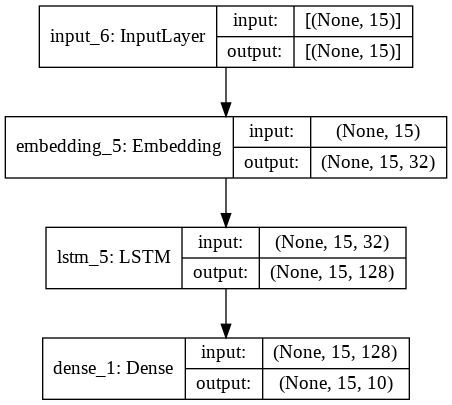

In [ ]:
base_network = my_base_model()
plot_model(base_network, show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def cosin_dist(vects):
  x, y = vects
  return cosine_similarity(x,y)

def cosin_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
from tensorflow.keras.layers import Lambda

In [ ]:
input_a = Input(shape=(15,), name="sentence1")
vect_output_a = base_network(input_a)

input_b = Input(shape=(15,), name="sentence2")
vect_output_b = base_network(input_b)

#output = Lambda(cosin_dist, name="output_layer", output_shape=cosin_dist_output_shape)([vect_output_a, vect_output_b])
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

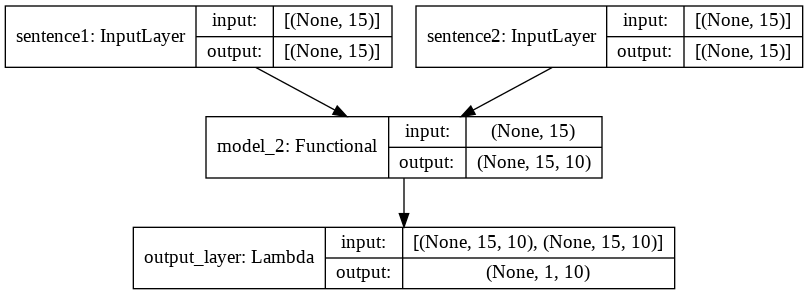

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
train_y = df['encoded_security'].astype(np.float16)

In [ ]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms,metrics=['accuracy'])
history = model.fit([sentence1_padded[:1714],sentence2_padded[:1714]], train_y[:1714], epochs=20, validation_data=([sentence1_padded[1714:],sentence2_padded[1714:]], train_y[1714:]))

Epoch 1/20
54/54 [==============================] - 5s 43ms/step - loss: 0.1890 - accuracy: 0.0636 - val_loss: 0.1901 - val_accuracy: 0.0584
Epoch 2/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1883 - accuracy: 0.0706 - val_loss: 0.1903 - val_accuracy: 0.1005
Epoch 3/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1886 - accuracy: 0.0758 - val_loss: 0.1922 - val_accuracy: 0.0350
Epoch 4/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1889 - accuracy: 0.1074 - val_loss: 0.1904 - val_accuracy: 0.0911
Epoch 5/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1884 - accuracy: 0.0712 - val_loss: 0.1921 - val_accuracy: 0.1005
Epoch 6/20
54/54 [==============================] - 2s 28ms/step - loss: 0.1886 - accuracy: 0.0630 - val_loss: 0.1911 - val_accuracy: 0.0748
Epoch 7/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1886 - accuracy: 0.0712 - val_loss: 0.1912 - val_accuracy: 0.1308
Epoch 8/20
54

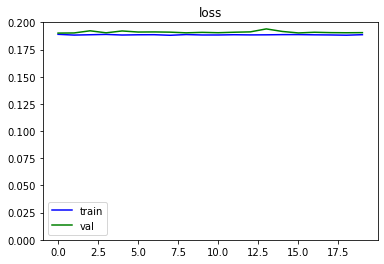

In [ ]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)
    plt.legend(['train', 'val'], loc='lower left')

plot_metrics(metric_name='loss', title="loss", ylim=0.2)

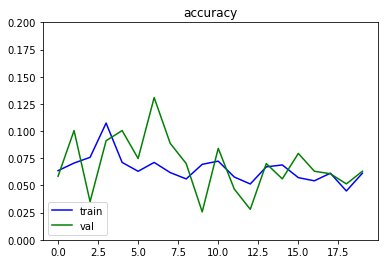

In [ ]:
plot_metrics(metric_name='accuracy', title="accuracy", ylim=0.2)